In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
suburbData = pd.read_pickle("./suburbData.pkl")
suburbData

,geometry,counts,%,suburb
LOC_NAME,,,,
Melbourne,"POLYGON ((144.97797 -37.83867, 144.97803 -37.8...",7500,79,Melbourne
Southbank,"POLYGON ((144.95308 -37.82740, 144.95328 -37.8...",1543,83,Southbank
St Kilda,"POLYGON ((144.99038 -37.87073, 144.99036 -37.8...",1457,69,St Kilda
Docklands,"POLYGON ((144.95376 -37.82363, 144.95336 -37.8...",1070,76,Docklands
Richmond,"POLYGON ((145.00407 -37.83137, 145.00396 -37.8...",1008,74,Richmond
...,...,...,...,...
Sandringham,"POLYGON ((145.00670 -37.95693, 145.00655 -37.9...",51,88,Sandringham
Upper Ferntree Gully,"POLYGON ((145.32416 -37.89994, 145.32414 -37.9...",51,50,Upper Ferntree Gully
Yarra Glen,"POLYGON ((145.36232 -37.67205, 145.36236 -37.6...",51,84,Yarra Glen


In [7]:
pollutantData = pd.read_pickle("./pollutantData.pkl")
pollutantData

,geometry,counts,suburb
LOC_NAME,,,
Melbourne,"POLYGON ((144.97797 -37.83867, 144.97803 -37.8...",24.0,Melbourne
Southbank,"POLYGON ((144.95308 -37.82740, 144.95328 -37.8...",4.0,Southbank
St Kilda,"POLYGON ((144.99038 -37.87073, 144.99036 -37.8...",0.0,St Kilda
Docklands,"POLYGON ((144.95376 -37.82363, 144.95336 -37.8...",19.0,Docklands
Richmond,"POLYGON ((145.00407 -37.83137, 145.00396 -37.8...",26.0,Richmond
...,...,...,...
Sandringham,"POLYGON ((145.00670 -37.95693, 145.00655 -37.9...",1.0,Sandringham
Upper Ferntree Gully,"POLYGON ((145.32416 -37.89994, 145.32414 -37.9...",13.0,Upper Ferntree Gully
Yarra Glen,"POLYGON ((145.36232 -37.67205, 145.36236 -37.6...",15.0,Yarra Glen


In [43]:
correlationData = pd.merge(suburbData, pollutantData, left_index=True, right_index=True)
correlationData

In [44]:
correlationData = correlationData[['%','counts_y']]

In [45]:
correlationData = correlationData[correlationData['counts_y'] != 0]

In [46]:
correlationData

,%,counts_y
LOC_NAME,,
Melbourne,79,24.0
Southbank,83,4.0
Docklands,76,19.0
Richmond,74,26.0
South Yarra,77,2.0
...,...,...
Williams Landing,73,10.0
Nunawading,72,38.0
Sandringham,88,1.0


In [47]:
#pd.to_pickle(correlationData, "./correlationData.pkl") 

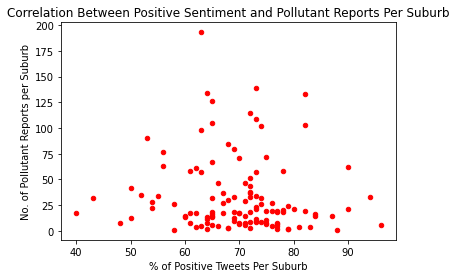

In [75]:
# a scatter plot comparing % positive tweets and reports of pollutants
graph = correlationData.plot(kind='scatter',x='%',y='counts_y',color='red')
graph.set_xlabel('% of Positive Tweets Per Suburb')
graph.set_ylabel('No. of Pollutant Reports per Suburb')
graph.set_title('Correlation Between Positive Sentiment and Pollutant Reports Per Suburb')
plt.show()

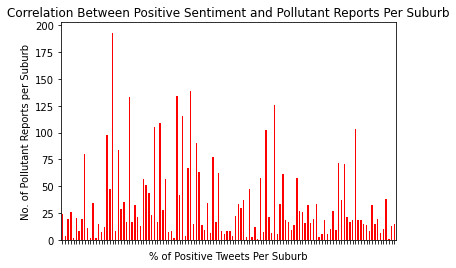

In [76]:
# a scatter plot comparing % positive tweets and reports of pollutants
graph = correlationData.plot(kind='bar',x='%',y='counts_y',color='red')
graph.xaxis.set_ticklabels([])
graph.set_xlabel('% of Positive Tweets Per Suburb')
graph.set_ylabel('No. of Pollutant Reports per Suburb')
graph.set_title('Correlation Between Positive Sentiment and Pollutant Reports Per Suburb')
graph.get_legend().remove()
plt.show()

In [62]:
correlationData['counts_y'].corr(correlationData['%'])

-0.08777319089745303